In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# 삼성전자 주가 불러오기
df = fdr.DataReader("005930", "2020", "2021")
df.shape

(248, 6)

In [3]:
# 일별 시세 미리보기
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [4]:
# Shift 를 활용해 전일 대비 수익률 구하기
# Change = ( 종가 / 전일종가 ) - 1
df["Change2"] = df["Close"] / df["Close"].shift(1) - 1

In [5]:
# 불러온 값과 직접 구한 값이 같은지 확인하기
df[["Change", "Change2"]].head()

,Change,Change2
Date,,
2020-01-02,-0.010753,NaN
2020-01-03,0.005435,0.005435
2020-01-06,0.000000,0.000000
2020-01-07,0.005405,0.005405
2020-01-08,0.017921,0.017921


In [6]:
# pct_change = (종가/전일종가) - 1
df["pct_change"] = df["Close"].pct_change()

In [7]:
# Diff 값 구하기
df["Diff"] = df["Close"].diff()

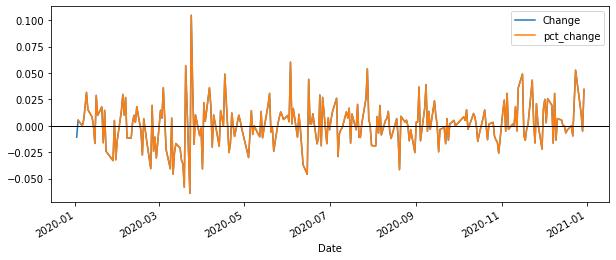

In [8]:
# "Change", "pct_change" 시각화 하기
df[["Change", "pct_change"]].plot(figsize = (10, 4))
plt.axhline(0, c="k", lw=1)

## diff 를 통한 증감 구하기

In [9]:
# 이전 데이터와 다음 데이터의 차이를 구합니다.
df["Close"].diff()

Date
2020-01-02       NaN
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
               ...  
2020-12-23    1600.0
2020-12-24    3900.0
2020-12-28     900.0
2020-12-29    -400.0
2020-12-30    2700.0
Name: Close, Length: 248, dtype: float64

In [10]:
# shift로 diff 구하기
# 종가 - 전일종가
df["Diff_Shift"] = df["Close"] - df["Close"].shift(1)
df

,Open,High,Low,Close,Volume,Change,Change2,pct_change,Diff,Diff_Shift
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,0.005435,0.005435,300.0,300.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.000000,0.000000,0.0,0.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,0.005405,0.005405,300.0,300.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,0.017921,0.017921,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130,0.022130,0.022130,1600.0,1600.0
2020-12-24,74100,78800,74000,77800,32502870,0.052774,0.052774,0.052774,3900.0,3900.0
2020-12-28,79000,80100,78200,78700,40085044,0.011568,0.011568,0.011568,900.0,900.0


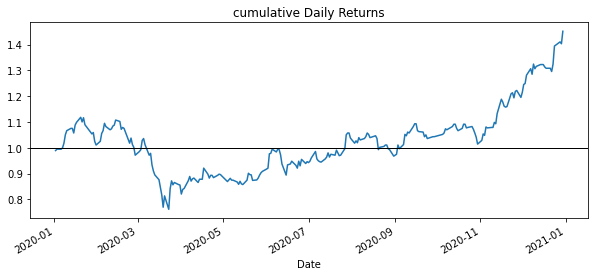

In [11]:
# 누적 수익률
# cumulative Daily Returns 일별 수익률을 누적곱으로 구하기
cum_daily_return = (df["Change"] + 1).cumprod()
cum_daily_return.plot(figsize = (10,4), title = "cumulative Daily Returns")
plt.axhline(1,c="k", lw=1)

In [13]:
# rolling을 이용하여 단순이동평균 구하기
# 윈도우 7, 14 단순 이동평균 구하기
df["SMA7"] = df["Close"].rolling(7).mean()
df["SMA14"] = df["Close"].rolling(14).mean()


<AxesSubplot:title={'center':'Simple Moving Average'}, xlabel='Date'>

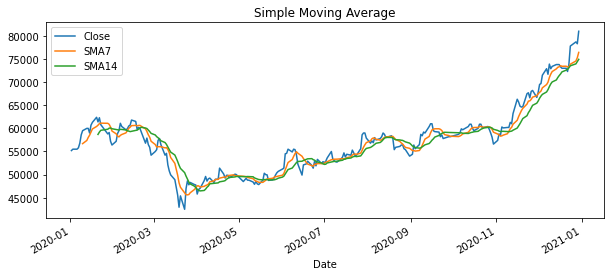

In [16]:
# "Close", "SMA7", "SMA14" 시각화 하기
df[["Close", "SMA7", "SMA14" ]].plot(figsize=(10,4), title = "Simple Moving Average")

In [19]:
# expanding 을 사용하면 window가 시간의 흐름에 따라 증가합니다.
df["CMA"] = df["Close"].expanding(14).mean()

<AxesSubplot:title={'center':'Cumulative moving average'}, xlabel='Date'>

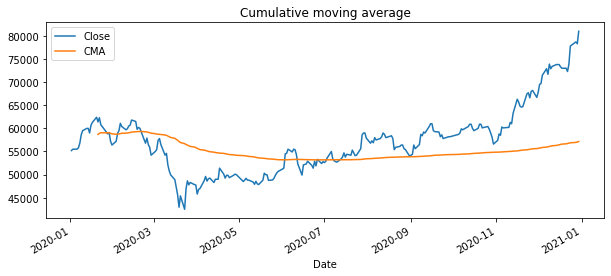

In [20]:
# 누적이동평균 시각화
df[["Close", "CMA"]].plot(figsize = (10,4), title = "Cumulative moving average")

In [21]:
# 최근 자료에 가중치를 더 주도록 지수 이동 평균을 구합니다.
# exponential weighted moving
df["EWM_short"] = df["Close"].ewm(span=12).mean()
df["EWM_long"] = df["Close"].ewm(span=26).mean()

<AxesSubplot:title={'center':'(Exponential Moving Average'}, xlabel='Date'>

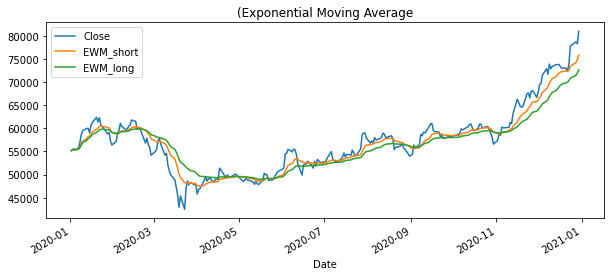

In [22]:
# "Close", "EWM_short", "EWM_long" 시각화
df[["Close", "EWM_short", "EWM_long"]].plot(figsize = (10,4),
                                           title = "(Exponential Moving Average" )

<AxesSubplot:xlabel='Date'>

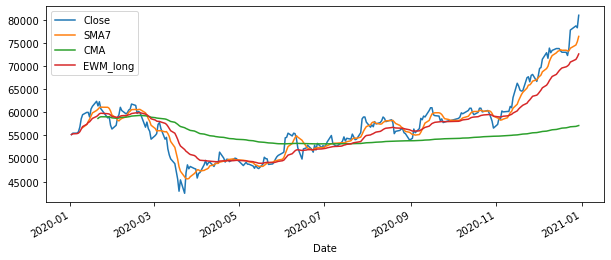

In [23]:
# 다양한 이동평균 비교하기
df[["Close", "SMA7","CMA" , "EWM_long"]].plot(figsize = (10,4))

In [25]:
# 인덱스의 데이터 타입이 datetime 형태라면 asfreq, resample을 통해 
# 특정 기간만큼 샘플링 혹은 추출을 할 수 있습니다.
df["Close"]

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2020-12-23    73900
2020-12-24    77800
2020-12-28    78700
2020-12-29    78300
2020-12-30    81000
Name: Close, Length: 248, dtype: int64

In [26]:
# asfreq : D단위로 샘플링
df["Close"].asfreq("D")

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04        NaN
2020-01-05        NaN
2020-01-06    55500.0
               ...   
2020-12-26        NaN
2020-12-27        NaN
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Freq: D, Name: Close, Length: 364, dtype: float64

In [28]:
# 일 단위로 샘플링을 하면 영업일이 아닌 데이터들이 결측치(NaN)로 되어 있습니다.
# fillna를 통해 method="ffill" 로 채우면 이전 영업일 데이터로 값을 채울 수 있습니다.
df["Close"].asfreq("D").fillna(method="ffill")

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04    55500.0
2020-01-05    55500.0
2020-01-06    55500.0
               ...   
2020-12-26    77800.0
2020-12-27    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Freq: D, Name: Close, Length: 364, dtype: float64

In [31]:
df["Close"].asfreq("D").interpolate()

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04    55500.0
2020-01-05    55500.0
2020-01-06    55500.0
               ...   
2020-12-26    78250.0
2020-12-27    78475.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Freq: D, Name: Close, Length: 364, dtype: float64

In [32]:
# 특정 주기 단위로 샘플링 예) 4일
df["Close"].asfreq("4D")

Date
2020-01-02    55200.0
2020-01-06    55500.0
2020-01-10    59500.0
2020-01-14    60000.0
2020-01-18        NaN
               ...   
2020-12-11    73400.0
2020-12-15    73800.0
2020-12-19        NaN
2020-12-23    73900.0
2020-12-27        NaN
Freq: 4D, Name: Close, Length: 91, dtype: float64

In [33]:
# 특정 주기 단위로 샘플링 예) 월단위
df["Close"].asfreq("M")

Date
2020-01-31    56400.0
2020-02-29        NaN
2020-03-31    47750.0
2020-04-30        NaN
2020-05-31        NaN
2020-06-30    52800.0
2020-07-31    57900.0
2020-08-31    54000.0
2020-09-30        NaN
2020-10-31        NaN
2020-11-30    66700.0
Freq: M, Name: Close, dtype: float64

In [34]:
# 특정 주기 단위로 샘플링 예) 분기단위
df["Close"].asfreq("Q")

Date
2020-03-31    47750.0
2020-06-30    52800.0
2020-09-30        NaN
Freq: Q-DEC, Name: Close, dtype: float64

### resample
* Resample time-series data.

In [35]:
# 일간 평균 구하기
df["Close"].resample("D").mean()

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04        NaN
2020-01-05        NaN
2020-01-06    55500.0
               ...   
2020-12-26        NaN
2020-12-27        NaN
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Freq: D, Name: Close, Length: 364, dtype: float64

In [36]:
# 월간 평균 구하기
df["Close"].resample("M").mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
Freq: M, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

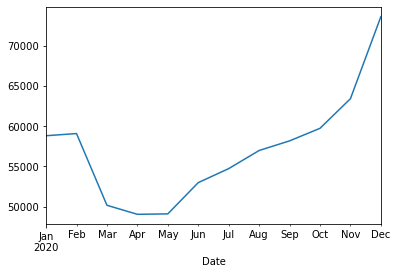

In [38]:
# 월간 평균 시각화
df["Close"].resample("M").mean().plot()

<AxesSubplot:xlabel='Date'>

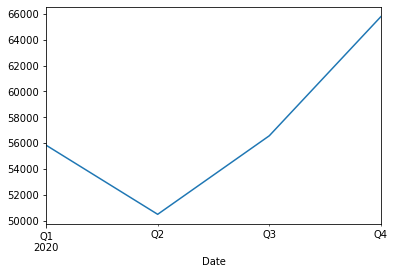

In [39]:
# 분기별 평균 구하기
df["Close"].resample("Q").mean().plot()

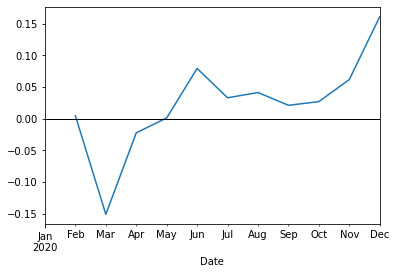

In [44]:
# 월별 평균 종가로 수익률 구하기
month_change = df["Close"].resample("M").mean().pct_change()
month_change.plot()
plt.axhline(0, c="k", lw=1)

## 20일간 종가의 이동평균

In [5]:
# 20일간 종가의 이동평균
df["MA20"] = df["Close"].rolling(20).mean()

In [6]:
# 종가의 기술 통계 값
df["Close"].describe()

count      248.000000
mean     57153.225806
std       7061.870134
min      42500.000000
25%      52275.000000
50%      56800.000000
75%      60100.000000
max      81000.000000
Name: Close, dtype: float64

In [41]:
# 볼린저 밴드를 plot하는 함수
# Close column값으로 20일 단위(rolling, window) 의 이동평균(mean)과
# 표준편차(std)를 구한다
# upper/lower band는 이동평균 +/- 표준편차x2 로 구합니다.

# plot 내에서 'k:' 등으로 색깔및 라인의 스타일을 지정할 수 있습니다.
# (k:black, r:red, b:blue, c:cyan, y:yellow 등등, color = '#0000ff'등으로 html색상표를 사용할 수도 있습니다.)
# fill_between으로 두개의 line 사이를 채울수도 있습니다.
# legend의 loc parameter는 기본값이 'best'이며 legend의 위치를 지정할 수 있습니다. (0~10의 값으로 대체 가능)

def show_bband(df, n=20, k=2):
    """
    볼린저 밴드
    N기간 동안의 이동평균(MA)
    이동평균 위의 K배 표준편차 상위 밴드
    이동평균 아래의 K배 표준편차 하위 밴드
    일반적으로 N과 K의 값은 20과 2
    """
    # 그래프의 스타일 설정
    plt.style.use("seaborn-whitegrid")
    # 20일간 종가의 이동평균
    df["MA20"] = df["Close"].rolling(20).mean()
    # 20일간 종가의 표준편차
    df["stddev"] = df["Close"].rolling(20).std()
    # 종가의 이동평균 + (표준편차 * 2)
    df["UpperB"] = df["MA20"] + (df["stddev"] * 2)
    # 종가의 이동평균 - (표준편차 * 2)
    df["LowerB"] = df["MA20"] - (df["stddev"] * 2)
    df = df[19:].copy()
    
    # window size 로 18번 인덱스까지(0~18) Nan 값이기 때문에 19번 인덱스 부터 사용
    plt.figure(figsize=(10,4))
    plt.plot(df.index, df.UpperB, "r--", label = "UpperB")
    plt.plot(df.index, df.Close, "k", label = "Close")
    plt.plot(df.index, df.MA20,  label = "MA20")
    plt.plot(df.index, df.LowerB, "b--", label = "LowerB")
    plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)
    plt.legend(loc="best")
    plt.title("Bollinger Bands")


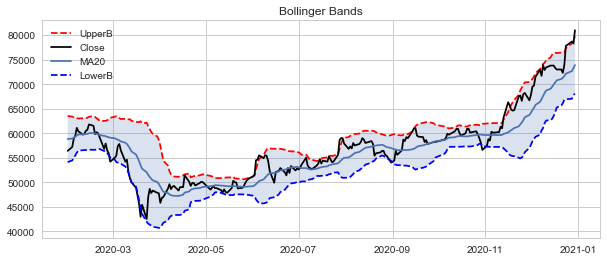

In [42]:
# 함수 확인하기
show_bband(df)

### 볼린저 밴드로 해외 주가 시각화

In [43]:
# FinanceDataReader의 DataReader는 미국 주식의 경우 종목코드대신 티커(Ticker)를 사용합니다.
# 티커는 약자와 비슷합니다.(마이크로소프트:MSFT, 스타벅스:SBUX 등등)
amd = fdr.DataReader("AMD", "2020", "2021")

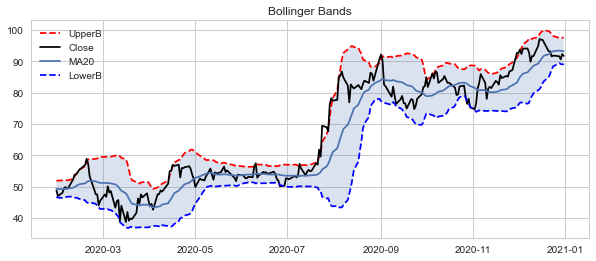

In [44]:
# AMD
show_bband(amd)

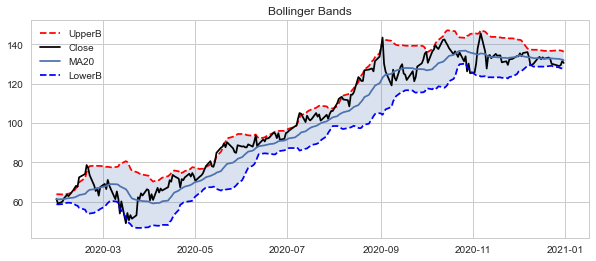

In [45]:
# NVIDA : NVDA
show_bband(fdr.DataReader("NVDA", "2020", "2021"))

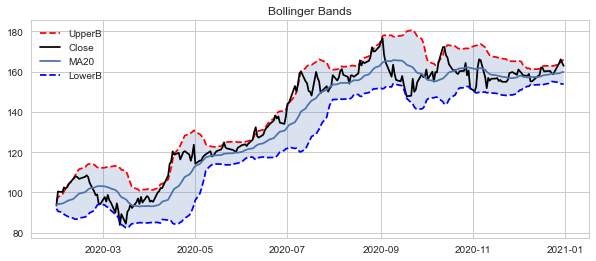

In [46]:
# 아마존 : AMZN
show_bband(fdr.DataReader("AMZN", "2020", "2021"))

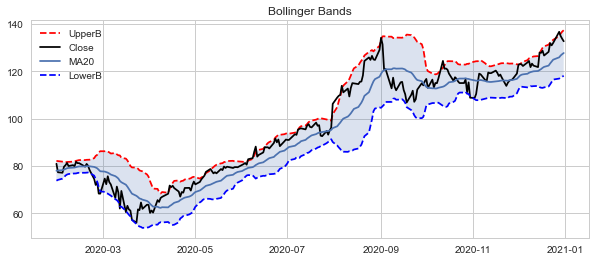

In [47]:
# Apple : AAPL
show_bband(fdr.DataReader("AAPL", "2020", "2021"))

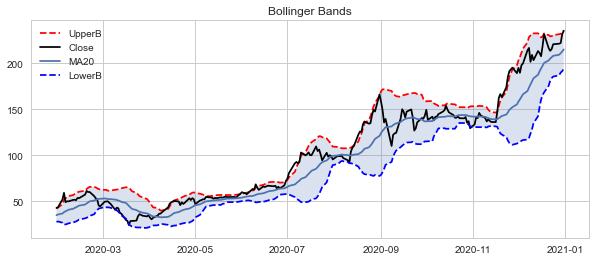

In [48]:
# TESLA : TSLA
show_bband(fdr.DataReader("TSLA", "2020", "2021"))

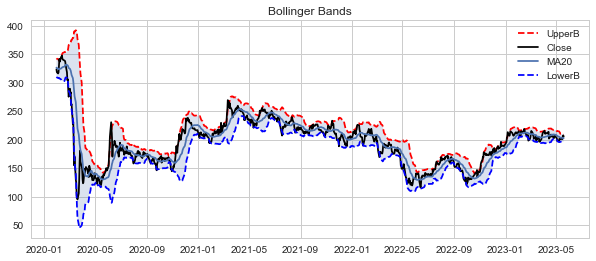

In [50]:
# Boeing : BA
show_bband(fdr.DataReader("BA", "2020"))

## 전일 대비 상승, 하락 변수 생성하기

In [5]:
# 전일 대비 가격 차이 구해서 diff 컬럼을 생성합니다.
# 결측치는 제거합니다.
df["diff"] = df["Close"].diff()


In [6]:
def UD(diff):
    """
    diff 값을 입력받아 0이면 ups, downs을 0으로 
    0보다 크면 ups 에 diff값을 작으면 downs 에 abs(diff) 값을 반환합니다.
    ups = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
    downs = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
    """
    ups = 0
    downs = 0
    if diff > 0:
        ups = diff
    elif diff < 0 : 
        downs = abs(diff)
    return pd.Series([ups,downs])

In [7]:
# 위에서 만든 함수를 통해 "U", "D" 컬럼 생성하기
df[["U", "D"]] = df["diff"].apply(UD)
df.head()

,Open,High,Low,Close,Volume,Change,diff,U,D
Date,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,0.0,0.0
2020-01-03,56000,56600,54900,55500,15422255,0.005435,300.0,300.0,0.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.0,0.0,0.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,300.0,300.0,0.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1000.0,1000.0,0.0


In [8]:
# AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
# AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
df["AU"] = df["U"].rolling(14).mean()
df["AD"]= df["D"].rolling(14).mean()
df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD
Date,,,,,,,,,,,
2020-12-23,72400,74000,72300,73900,19411326,0.022130,1600.0,1600.0,0.0,564.285714,264.285714
2020-12-24,74100,78800,74000,77800,32502870,0.052774,3900.0,3900.0,0.0,714.285714,264.285714
2020-12-28,79000,80100,78200,78700,40085044,0.011568,900.0,900.0,0.0,678.571429,264.285714
2020-12-29,78800,78900,77300,78300,30339449,-0.005083,-400.0,0.0,400.0,678.571429,207.142857
2020-12-30,77400,81300,77300,81000,29417421,0.034483,2700.0,2700.0,0.0,714.285714,207.142857


In [9]:
# RS, RSI값을 계산해 컬럼에 담습니다.
df["RS"] = df["AU"] / df["AD"]
df["RSI"] = df["RS"] / (1+df["RS"])
df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD,RS,RSI
Date,,,,,,,,,,,,,
2020-12-23,72400,74000,72300,73900,19411326,0.022130,1600.0,1600.0,0.0,564.285714,264.285714,2.135135,0.681034
2020-12-24,74100,78800,74000,77800,32502870,0.052774,3900.0,3900.0,0.0,714.285714,264.285714,2.702703,0.729927
2020-12-28,79000,80100,78200,78700,40085044,0.011568,900.0,900.0,0.0,678.571429,264.285714,2.567568,0.719697
2020-12-29,78800,78900,77300,78300,30339449,-0.005083,-400.0,0.0,400.0,678.571429,207.142857,3.275862,0.766129
2020-12-30,77400,81300,77300,81000,29417421,0.034483,2700.0,2700.0,0.0,714.285714,207.142857,3.448276,0.775194


In [10]:
# RSI_signal 변수를 생성합니다.

df['RSI_signal'] = df["RSI"].rolling(6).mean()
df.tail()

,Open,High,Low,Close,Volume,Change,diff,U,D,AU,AD,RS,RSI,RSI_signal
Date,,,,,,,,,,,,,,
2020-12-23,72400,74000,72300,73900,19411326,0.022130,1600.0,1600.0,0.0,564.285714,264.285714,2.135135,0.681034,0.702519
2020-12-24,74100,78800,74000,77800,32502870,0.052774,3900.0,3900.0,0.0,714.285714,264.285714,2.702703,0.729927,0.704224
2020-12-28,79000,80100,78200,78700,40085044,0.011568,900.0,900.0,0.0,678.571429,264.285714,2.567568,0.719697,0.709359
2020-12-29,78800,78900,77300,78300,30339449,-0.005083,-400.0,0.0,400.0,678.571429,207.142857,3.275862,0.766129,0.711031
2020-12-30,77400,81300,77300,81000,29417421,0.034483,2700.0,2700.0,0.0,714.285714,207.142857,3.448276,0.775194,0.718206


<AxesSubplot:xlabel='Date'>

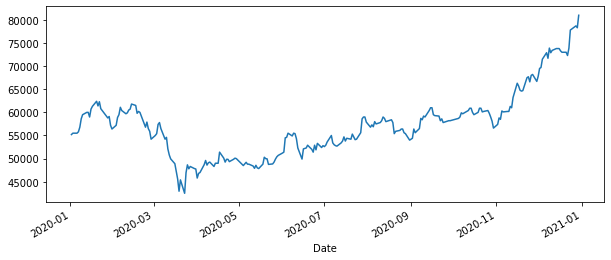

In [11]:
# RSI와 비교해 보기 위해 종가를 시각화 합니다.
df["Close"].plot(figsize=(10,4))

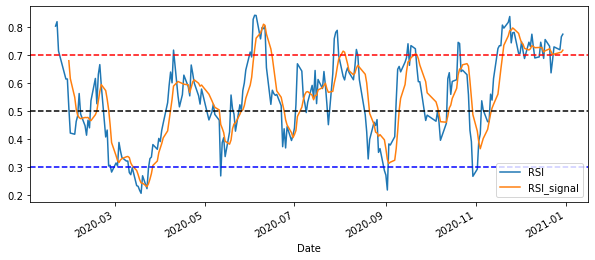

In [14]:
# 'RSI','RSI_signal' 을 시각화 하고 0.7, 0.5, 0.3 기준선을 그립니다.
df[['RSI','RSI_signal']].plot(figsize = (10,4))
plt.axhline(0.7, c="r", ls="--")
plt.axhline(0.5, c="k", ls="--")
plt.axhline(0.3, c="b", ls="--")

In [16]:
# plotly로 시각화하기
# plotly.express 로드하기
import plotly.express as px

In [19]:
# 0.3, 0.7 값을 컬럼으로 만들어 줍니다.
df["s3"] = 0.3
df["s7"] = 0.7

In [21]:
# plotly.express 를 통해 시각화 합니다.
px.line(df[['RSI','RSI_signal', 's3', 's7']])

### graph_objs 와 subplots 을 사용한 시각화

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1,
                    vertical_spacing=0.01,
                    shared_xaxes=True,
                    subplot_titles=('<b>삼성전자</b>',
                                    '<b>Select Date Range!</b>',
                                    '<b>RSI & RSI signal</b>'))

fig.add_trace(go.Candlestick(x=df.index, 
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],name='candle stick'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['RSI'],
                         line=dict(color='blue'),
                         name='RSI'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['RSI_signal'],
                         line=dict(color='red'),
                         name='RSI_signal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=np.ones(len(df))*0.3,
                         line=dict(color='red',dash='dash'),
                         name='Low bound'),row=3,col=1)
fig.add_trace(go.Scatter(x=df.index, y=np.ones(len(df))*0.7,
                         line=dict(color='blue',dash='dash'),
                         name='High bound'),row=3,col=1)

fig.update_layout(width=800, height=800, xaxis_rangeslider_visible=True)

fig.show()

* (주의사항) RSI 지표역시 하나의 단순한 지표이기 때문에 너무 맹신하여서는 안 됩니다.

## 지수이동평균 구하기
* 단순이동평균선은 추세전환 신호가 늦게 나타난다는 단점이 있기 때문에 이를 해결하기 위해서 MACD에서는 지수이동평균을 사용합니다.

In [6]:
# 12일, 26일에 대한 지수이동평균을 구합니다.
short = 12
long = 26
df["ema_short"] = df["Close"].ewm(short).mean()
df["ema_long"] = df["Close"].ewm(long).mean()

<AxesSubplot:xlabel='Date'>

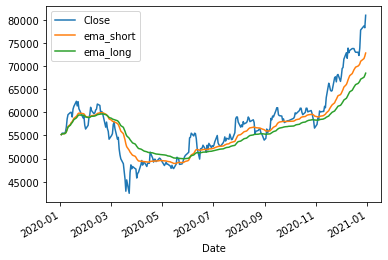

In [9]:
# "Close", "ema_short", "ema_long" 을 시각화 합니다.
df[["Close", "ema_short", "ema_long"]].plot()

## MACD값 구하기

In [10]:
# MACD = 단기 지수이동평균 - 장기 지수이동평균
df["MACD"] = df["ema_short"] - df["ema_long"]

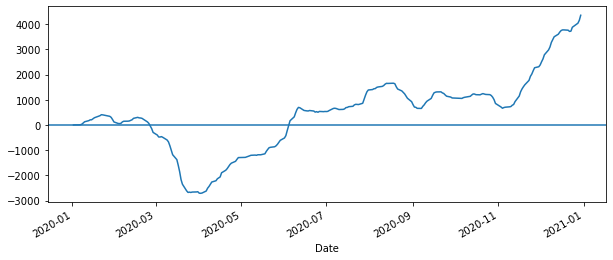

In [12]:
# MACD 값 시각화
df["MACD"].plot(figsize=(10,4))
plt.axhline(0)


## signal 값 구하기

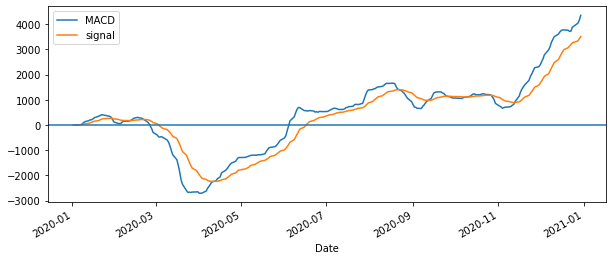

In [15]:
# MACD의 9일 이동평균값을 구합니다.
df["signal"] = df["MACD"].ewm(9).mean()

df[["MACD","signal"]].plot(figsize=(10,4))
plt.axhline(0)

## MACD oscillator 값 구하기
* 볼린저 밴드의 %B 값
* RSI의 signal 값
* macdhist 값은 오실레이터(oscillator) 와 유사합니다.
* 기준선을 중심으로 아래위로 움직이는 성질을 갖는 지표를 오실레이터라 한다. 대개 추세 변화를 빨리 감지하려는 목적이며, 그래프의 기울기(변화량)를 측정하는 것과 비슷하다. 출처 : [스토캐스틱 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%86%A0%EC%BA%90%EC%8A%A4%ED%8B%B1)

<BarContainer object of 248 artists>

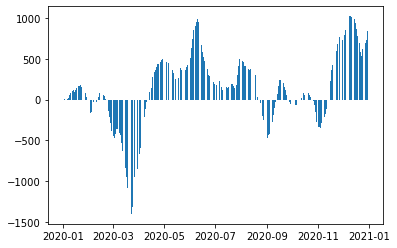

In [18]:
df["macdhist"] = df["MACD"] - df["signal"]
#df["macdhist"].plot()
plt.bar(df.index, df.macdhist)

## MACD 함수 만들기
* assign 을 사용한 컬럼 만들기
* pandas 의 ewm  : exponential weighted moving

In [24]:
# 각 주기에 5를 곱해서 short=60, long=130, t=45로 설정하면
# 매수매도가 빈번하게 생기는 것을 조정할 수 있습니다.
def make_macd(df, short=12, long=26, t=9):
    """
    데이터프레임을 받아 
    ema_short, ema_long, MACD, signal, macdhist 값을 생성하는 함수를 작성합니다.
    """
    ema_short = df.Close.ewm(short).mean()
    ema_long = df.Close.ewm(long).mean()
    MACD = ema_short - ema_long
    signal = MACD.ewm(t).mean()
    macdhist = MACD - signal
    
    df = df.assign(ema_short = ema_short,ema_long = ema_long,
                  MACD=MACD,signal=signal, macdhist=macdhist )
    return df

In [25]:
# 함수를 통해 MACD변수를 생성합니다.
make_macd(df)

,Open,High,Low,Close,Volume,Change,ema_short,ema_long,MACD,signal,macdhist
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,55200.000000,55200.000000,0.000000,0.000000,0.000000
2020-01-03,56000,56600,54900,55500,15422255,0.005435,55356.000000,55352.830189,3.169811,1.668322,1.501490
2020-01-06,54900,55600,54600,55500,10278951,0.000000,55407.889126,55403.749407,4.139719,2.580276,1.559443
2020-01-07,55700,56400,55600,55800,10009778,0.005405,55517.980831,55508.488552,9.492279,4.590164,4.902115
2020-01-08,56200,57400,55900,56800,23501171,0.017921,55816.980100,55786.646004,30.334096,10.876685,19.457411
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130,70484.404523,66761.471281,3722.933242,3190.460956,532.472287
2020-12-24,74100,78800,74000,77800,32502870,0.052774,71047.142638,67170.345118,3876.797521,3259.094612,617.702908
2020-12-28,79000,80100,78200,78700,40085044,0.011568,71635.823976,67597.409042,4038.414934,3337.026644,701.388290


In [26]:
amd = fdr.DataReader("AMD", "2020", "2021")
amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [28]:
# MACD관련 변수가 잘 생성되었는지 확인합니다.
amd= make_macd(amd)
amd

,Open,High,Low,Close,Adj Close,Volume,ema_short,ema_long,MACD,signal,macdhist
Date,,,,,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,49.099998,49.099998,0.000000,0.000000,0.000000
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,48.839998,48.845281,-0.005283,-0.002781,-0.002502
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,48.677845,48.687758,-0.009913,-0.005413,-0.004501
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,48.557720,48.572048,-0.014327,-0.008005,-0.006322
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,48.387998,48.412231,-0.024233,-0.011968,-0.012265
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,91.800003,92.510002,91.309998,91.809998,91.809998,16705900,91.291428,87.549742,3.741687,3.392708,0.348978
2020-12-28,92.930000,93.139999,90.820000,91.599998,91.599998,30627300,91.315164,87.699763,3.615401,3.414978,0.200423
2020-12-29,91.660004,92.459999,89.430000,90.620003,90.620003,31748200,91.261691,87.807929,3.453762,3.418856,0.034906


In [30]:
# macdhist 값을 확인합니다.
df["macdhist"].describe()

count     248.000000
mean      124.758228
std       459.393121
min     -1404.642148
25%       -70.799989
50%       143.932315
75%       401.228252
max      1024.555679
Name: macdhist, dtype: float64

<AxesSubplot:>

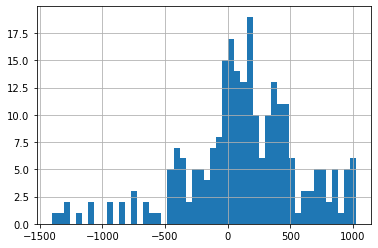

In [31]:
# macdhist 의 히스토그램을 그립니다.
df["macdhist"].hist(bins=50)

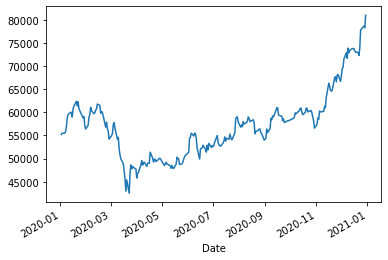

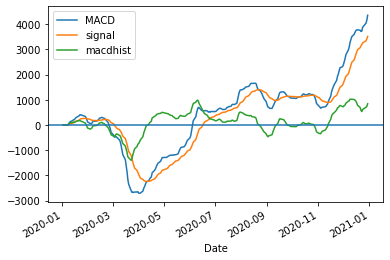

In [34]:
# "MACD", "signal", "macdhist" 값을 시각화 합니다.
df.Close.plot()
df[["MACD", "signal", "macdhist"]].plot()
plt.axhline(0)

#### barplot의 숫자를 일부 구간만 표기하기

<BarContainer object of 248 artists>

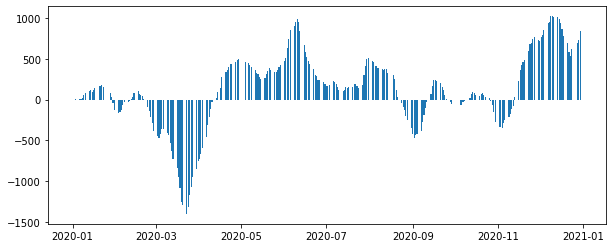

In [36]:
# Pandas의 막대그래프로 시각화를 할 때도 x축의 값을 커스텀하게 지정해 줄 수도 있지만
# matplotlib을 직접 사용해 그리는 것이 좀 더 간편합니다.
plt.figure(figsize=(10,4))
plt.bar(df.index, df.macdhist)

In [41]:
ohlc_col = ["Open", "High", "Low", "Close"]

## MACD 시각화 함수 만들기

In [57]:
def plot_macd(df):
    """
    make_macd 함수를 통해 필요한 변수를 만들고 pyplot으로 시각화 합니다.
    """
    df = make_macd(df)
    df[ohlc_col].plot(figsize = (10,4), title="OHLC")
    
    fig , axes = plt.subplots(figsize=(10,4))

    plt.plot(df.index, df["MACD"], label = "MACD")
    plt.plot(df.index, df["signal"], label = "signal")
    plt.bar(df.index, df["macdhist"],label = "macdhist" )
    plt.axhline(0, c="k", lw=1)
    plt.title("MACD")
    plt.legend(loc="best")

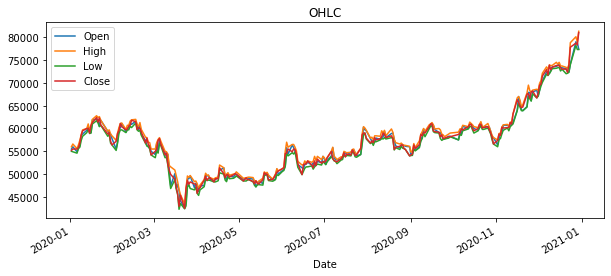

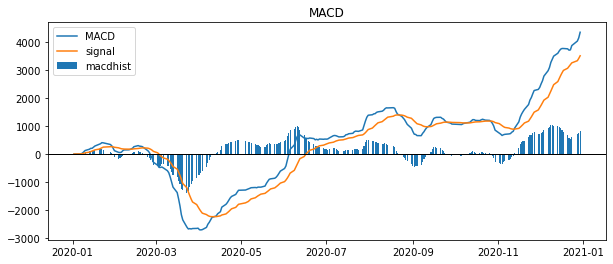

In [58]:
plot_macd(df)

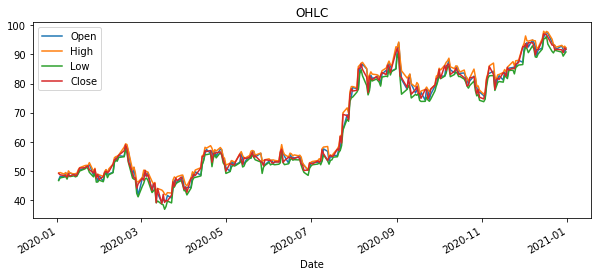

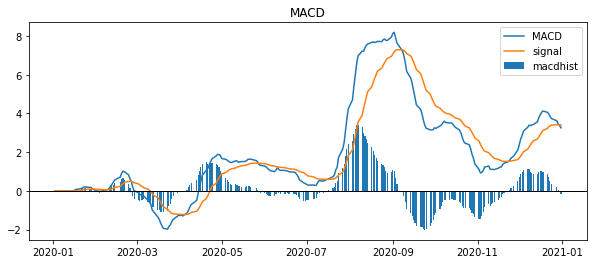

In [59]:
plot_macd(amd)

In [64]:
# 아래 그래프 실행 시 오류가 난다면 plotly 버전을 업데이트 해주세요.
px.line(df[ohlc_col], title = "OHLC", height=300)

In [67]:
# "MACD", "signal" 을 시각화 합니다.
px.line(df[["MACD", "signal"]], title="MACD", height=300)

In [68]:
# 막대그래프로 macdhist 를 시각화 합니다.
px.bar(df["macdhist"], height=300)

### graph_objects 와 subplots 을 사용한 시각화
* [Subplots | Python | Plotly](https://plotly.com/python/subplots/)

In [70]:
# plotly의 subplots, graph_objects 로드하기
import plotly.graph_objects as go
from plotly import subplots

In [86]:
candlestick = go.Candlestick(x=df.index, open=df.Open,
                             high=df.High, low=df.Low, close=df.Close)
macd = go.Scatter(x=df.index, y=df["MACD"], name="MACD")
signal = go.Scatter(x=df.index, y=df["signal"], name="signal")
oscillator = go.Bar(x=df.index, y=df["macdhist"], name="oscillator")

trade_volume = go.Bar(x=df.index, y=df["Volume"], name="거래량")
# layout = go.Layout(title='MACD 그래프')

In [89]:
# make_subplots을 통해 2개의 행과 1개의 컬럼을 갖는 서브플롯을 생성합니다.
# append_trace 를 통해 fig 변수 안에 시각화 하고자 하는 그래프를 넣어줍니다.
fig = subplots.make_subplots(rows=4, cols=1)
fig.append_trace(candlestick,1,1)
fig.append_trace(macd, 3,1)
fig.append_trace(signal, 3,1)
fig.append_trace(oscillator, 3,1)
fig.append_trace(trade_volume, 4,1)
fig.show()

In [ ]:
# fig.show()로 그래프를 표시합니다.


In [ ]:
# fig.show()가 동작하지 않는다면 아래의 코드를 사용해 주세요.
import plotly.offline as offline 
# plotly.offline.plot() : 로컬에 html 파일 형태로 저장된 그래프를 사용할 수 있습니다.
# plot.offline.iplot() : 주피터 노트북에 그래프가 표시되게 합니다.
offline.iplot(fig)

In [6]:
import pandas as pd

df = cf.datagen.ohlcv()
df.shape

(100, 5)

## pandas를 통한 OHLC 데이터 시각화 하기

<AxesSubplot:>

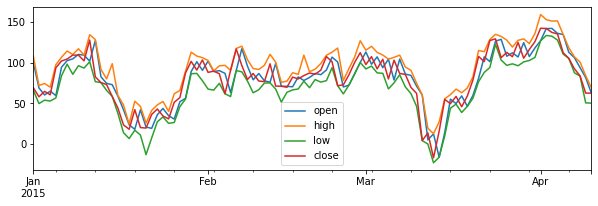

In [10]:
# "open", "high", "low", "close"
df[["open", "high", "low", "close"]].plot(figsize=(10,3))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

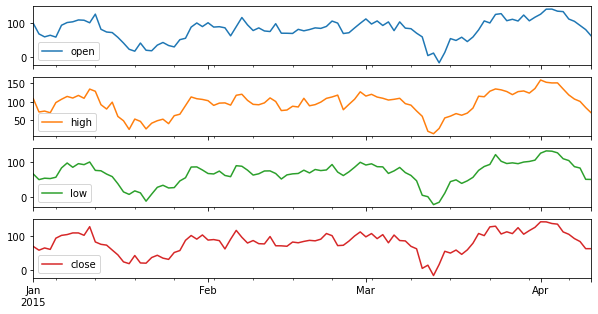

In [17]:
# subplots 그리기
df[["open", "high", "low", "close"]].plot(figsize=(10,5), subplots=True)

## cufflinks 를 통한 plotly 쉽게 사용하기

In [14]:
# pandas의 plot을 iplot으로 바꾸면 plotly로 시각화 합니다.
df[["open", "high", "low", "close"]].iplot()

In [20]:
# pandas의 plot을 iplot으로 바꾸면 plotly로 시각화 합니다.
df[["open", "high", "low", "close"]].iplot(subplots=True)

## cufflinks 의 QuantFig 사용하기
* QuantFig 를 사용하면 캔들차드와 보조 지표 몇 가지를 쉽게 그려볼 수 있습니다.

In [29]:
qf = cf.QuantFig(df, name="캔들차트")
qf

{
    "_d": {
        "close": "close",
        "high": "high",
        "low": "low",
        "open": "open",
        "volume": "volume"
    },
    "data": {
        "datalegend": true,
        "kind": "candlestick",
        "name": "\uce94\ub4e4\ucc28\ud2b8",
        "resample": null,
        "slice": [
            null,
            null
        ]
    },
    "kwargs": {},
    "layout": {
        "annotations": {
            "params": {},
            "values": []
        },
        "margin": {
            "b": 30,
            "l": 30,
            "r": 30,
            "t": 30
        },
        "rangeselector": {
            "visible": false
        },
        "rangeslider": false,
        "shapes": {},
        "showlegend": true
    },
    "panels": {
        "bottom_margin": 0,
        "min_panel_size": 0.15,
        "spacing": 0.08,
        "top_margin": 0.9
    },
    "studies": {},
    "theme": {
        "down_color": "grey",
        "theme": "pearl",
        "up_color": "#17BECF"


In [30]:
# qf.iplot() 으로 시각화 합니다.
qf.iplot()

## QuantFig 로 볼린저 밴드 그리기

[santosjorge/cufflinks: Productivity Tools for Plotly + Pandas](https://github.com/santosjorge/cufflinks)

In [31]:
# add_bollinger_bands 로 볼린저 밴드를 추가합니다.
qf.add_bollinger_bands()

In [32]:
# qf.iplot() 으로 그래프를 보여줍니다.
qf.iplot()

In [34]:
# QuantFig 를 통해 이동평균, 볼린저밴드, RSI, 거래량, MACD 값을 그립니다
qf = cf.QuantFig(df, name="캔들차트")
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_macd()
qf.add_volume()
qf.iplot()

## 특정 주가를 가져와서 시각화 하기

In [35]:
# FinanceDataReader 로 테슬라: TSLA 주가 가져오기
import FinanceDataReader as fdr

tsla = fdr.DataReader("TSLA", "2020", "2021")
tsla.shape

(253, 6)

In [36]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [43]:
# QuantFig 를 통한 테슬라 주가 시각화
qf = cf.QuantFig(df)
qf.add_sma([30,60], color=["red", "blue"])
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_macd()
qf.add_volume()
qf.iplot()